## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
import pandas as pd
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
print(f"There are {df.shape[0]} rows in the the dataset.")

There are 294478 rows in the the dataset.


c. The number of unique users in the dataset.

In [4]:
print(f"There are {df.user_id.nunique()} unique users in the dataset")

There are 290584 unique users in the dataset


d. The proportion of users converted.

In [5]:
print(f"About {df[df.converted == 1].user_id.nunique()/df.user_id.nunique()} \nconverted")

About 0.12104245244060237 
converted


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
temp = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]
print(f"The new_page and treatment don't match for \n{temp} times.")

The new_page and treatment don't match for 
3893 times.


f. Do any of the rows have missing values?

In [7]:
print(f"There are {df.isnull().sum().sum()} missing or NaN values in the dataframe")

There are 0 missing or NaN values in the dataframe


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.loc[df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True].index]

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
print(f"There are {df2.user_id.nunique()} unique users in df2")

There are 290584 unique users in df2


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
print(f"The user_id of the duplicated user is \n{df2[df2.user_id.duplicated()].user_id.values[0]}")

The user_id of the duplicated user is 
773192


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop(1899, inplace = True)
n = df2.shape[0]

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
print(f"The probability of an individual converting regardless of the page they receive is\n{df2.converted.mean()}")

The probability of an individual converting regardless of the page they receive is
0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
print(f"The probability of an individual converting given they are in the control group is\n{df2[df2.group == 'control'].converted.mean()}")

The probability of an individual converting given they are in the control group is
0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
print(f"The probability of an individual converting given they are in the treatment group is\n{df2[df2.group == 'treatment'].converted.mean()}")

The probability of an individual converting given they are in the treatment group is
0.11880806551510564


d. What is the probability that an individual received the new page?

In [17]:
print(f"The probability the an individual received the new page is\n{sum(df2.landing_page == 'new_page')/n}")

The probability the an individual received the new page is
0.5000619442226688


In [18]:
df2 = df2.sort_values("timestamp")
print(f"First recorded day: {df2.iloc[0].timestamp}\nLast recorded day: {df2.iloc[-1].timestamp}")

First recorded day: 2017-01-02 13:42:05.378582
Last recorded day: 2017-01-24 13:41:54.460509


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

The conversion rate of individuals regardless of the page they received is about 12%.
Almost same rate (+- 0.3%) applies for individuals who had received either the new page or the old page.
Given that small difference, their is no sufficiant evidence that the new page lead to more conversions. The results may differ if the experiment not only lasts for about three weeks or maybe other features would have been considered.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

>$H_0:p_{old} \geq p_{new}$  
>  
>$H_1:p_{old} < p_{new}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
# df2 still in memory...
p_new = df2.converted.mean()

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old = df2.converted.mean()

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
n_new = sum(df2.group == "treatment")
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = sum(df2.group == "control")
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice([1,0], size = n_new, p = [p_new, 1 - p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice([1,0], size = n_old, p = [p_old, 1 - p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
p_diff = new_page_converted.mean() - old_page_converted.mean()
p_diff

0.0017185711021943662

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size = n_new, p = [p_new, (1 - p_new)])
    old_page_converted = np.random.choice([1,0], size = n_old, p = [p_old, (1 - p_old)])
    p_diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_diff)
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  1.00000000e+00,   1.00000000e+01,   1.22000000e+02,
          6.92000000e+02,   2.30600000e+03,   3.37900000e+03,
          2.41100000e+03,   9.13000000e+02,   1.53000000e+02,
          1.30000000e+01]),
 array([-0.00585925, -0.00480341, -0.00374756, -0.00269172, -0.00163587,
        -0.00058003,  0.00047582,  0.00153166,  0.00258751,  0.00364335,
         0.0046992 ]),
 <a list of 10 Patch objects>)

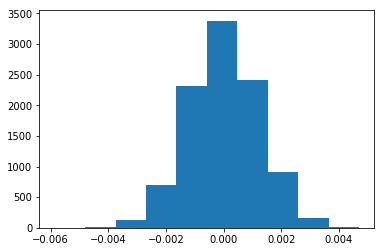

In [27]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

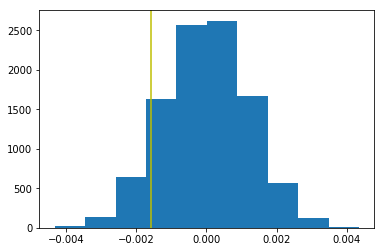

In [28]:
diff = df2[df2.group == "treatment"].converted.mean() - df2[df2.group == "control"].converted.mean()
diff
# nullvals according to lecture ...
nullvals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(nullvals);
plt.axvline(diff, color = 'y')

In [29]:
# in numbers...
(nullvals > diff).mean()

0.90149999999999997

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We just computed the p value. It is assumed that the null hypothesis is true and the p value is the probability, that the statistics are from the null hypothesis. In that case the Type 1 erro was set to 5%, and with a p value of about 90% it is safe to say that it is failed to reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = df2[df2.group == "control"].converted.sum()
convert_new = df2[df2.group == "treatment"].converted.sum()
n_old = sum(df2.group == "control")
n_new = sum(df2.group == "treatment")

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [31]:
z, p = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z, p)

1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The p value is almost the same as previously calculated and therefore still falis to reject the null hypothesis.
Given a Z-Value of 1.31 it is still smaller than the critical Z-score of about 1.645 (getting the Z-table for normal disrtibution, checking for the datapoint 1-alpha). That test also fails to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

In general either linear or logisitig regression is possible here. Given the fact that this is a binary classification problem (yes or no, 1 or 0) it's better to use logistic regression with an appropriate threshold for the conversion probability.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
df2['intercept'] = 1
df2['ab_page'] = df2.group.apply(lambda x: 1 if x == 'treatment' else 0)

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [33]:
lm = sm.Logit(df2.converted, df2[['intercept', 'ab_page']])
res = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-01 23:02 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p value associated with ab_page is approximately 0.19. The Null hypothesis for the regression problem states, that there is not relation between the label or the value that should be predicted and the input variable(s).
Given a usual threshold of 10% or 5%, in this case 0.19 is above that and therefore this also fails to reject the null hypothesis. Would it have been lower than the threshold, then the input variable is somehow related or has a meaningful impact on the dependent variable.
Moreover regression case was a two sided tested, in saying no relationship.
The first cases on one hand investigated a less or equal situation.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Since the ab_page isn't a good feature, it would make totally sense to add some features.
One could be the time when people visit the page. For example some groups of people visit certain pages only after 8pm or some age groups are active around 4pm. Similar to the credit card fraud, some groups might only visit during the weekend.

One downside might be multicollonearity where features show some correlations with each other and would therefore make the model unstable.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [35]:
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [36]:
df3 = df2.set_index('user_id').join(countries_df.set_index('user_id'), on='user_id').reset_index().drop(['user_id', 'timestamp', 'group', 'landing_page'], axis = 1)
# see if there is any impact on conversion from countries
df3.groupby(['country', 'ab_page']).mean()

converted  intercept
country ab_page                      
CA      0         0.118783        1.0
        1         0.111902        1.0
UK      0         0.120022        1.0
        1         0.121171        1.0
US      0         0.120630        1.0
        1         0.118466        1.0

It's a similar picture with about 12% as in the beginning. So, it doesn't seem to have an impact.
Given the p values provided by the summary, there doesn't seem any evidence that the country feature added any meaning to the model

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [37]:
# add features, use US as base, drop obsolete columns
df3 = df3.join(pd.get_dummies(df3.country)).drop(['country', 'US'], axis = 1)
df3.head()

,converted,intercept,ab_page,CA,UK
0,0,1,1,0,0
1,0,1,0,0,1
2,0,1,0,0,0
3,0,1,1,0,0
4,0,1,1,0,0


In [48]:
# mentor hint to create interaction terms
df3["CA_ab_page"] = df3["CA"] * df3["ab_page"]
df3["UK_ab_page"] = df3["UK"] * df3["ab_page"]

# create models with and without interaction terms and fit the data
print('Model without interaction terms:')
lm0 = sm.Logit(df3.converted, df3[['intercept', 'ab_page', 'CA', 'UK']])
res0 = lm0.fit()

print('\nModel with interaction terms:')
lm = sm.Logit(df3.converted, df3[['intercept', 'ab_page', 'CA', 'UK', 'CA_ab_page', 'UK_ab_page']])
res = lm.fit()

print('Model summary without interaction terms:')
# show summaries
res0.summary2()

Model without interaction terms:
Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6

Model with interaction terms:
Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6
Model summary without interaction terms:


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-01 23:05 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

In [47]:
print('Model summary with interaction terms:')
res.summary2()

Model summary with interaction terms:


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-01 23:05 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CA_ab_page   -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
UK_ab_page    0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
==================================================================

"""

Given the results, the p_values for the interaction terms are not significant and also decrease in significance of compared to the baseline country "US" when addings. Adding the interaction terms would for one make the model more complex and maybe even unstable if there is any correlation with the input variables. Also it very slightly decreases in performance.
Therefore it failed again to reject the null hypothesis.
Since it failed all the time to reject the null hpothesis, it is not advised to switch to the new page.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0